# Grade: /100 points

# Lab Assignment 01: Supervised learning, Linear models, and Loss functions

In this Lab assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1258]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

<AxesSubplot:title={'center':'Possum Tail Length vs. Age'}, xlabel='age', ylabel='tailL'>

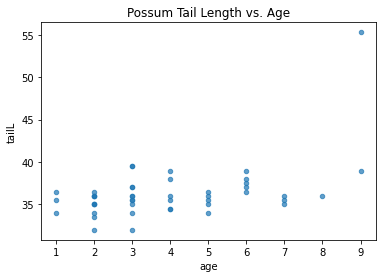

In [1259]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

#Scatter plot 
possum_data.plot.scatter(x = 'age', y = 'tailL', title = 'Possum Tail Length vs. Age', alpha = 0.7)

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call you function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [1260]:
def linearModelPredict(b,X):
    yp = np.dot(X, b)
    return yp

# Input Data
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

# Input Data 2
X2 = np.array([[1,1],[1,-1],[1, 2]])
b2 = np.array([0.2,0.45])


# Output Data
print(linearModelPredict(b, X))
print(linearModelPredict(b2, X2))

# Report  𝐲̂  . What is the dimensionality of the numpy-array that you get back?
# The returned 𝐲̂  is  [1x3] numpy-array

# What happens when b is a 2d-array? 
# The returned 𝐲̂  would be  [2x3] numpy-array



[ 0.1 -0.2  0.7]
[ 0.65 -0.25  1.1 ]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 
Written answer: To minimize the cost do you need increase or decrease the value of the parameters? 

In [1261]:
def linearModelLossRSS(b, X, y):

    yp = X @ b
    l = sum(np.square(y-yp))
    
    grad = (X.T @ (y-yp)) * -2
    return l, grad


# Input Data OG
X0 = np.array([[1,0],[1,-1],[1,2]])
b01 = np.array([0.1,0.3])
b02 = np.array([0.1,0.5])
b03 = np.array([0.2,0.3])
y0 = np.array([0,0.4,2])

#Input Data 1
X1 = np.array([[2,1],[3,-1],[-1, 1]])
b1 = np.array([0.2,0.45])
y1 = np.array([0.2,0.6, 2])
 

# Input Data 2
X2 = np.array([[1,1],[1,-1],[1, 2]])
b2 = np.array([0.2,0.45])
y2 = np.array([0.2,0.1, 2])


# Output Data
print(linearModelLossRSS(b01, X0, y0))
print(linearModelLossRSS(b02, X0, y0))
print(linearModelLossRSS(b03, X0, y0))

print(linearModelLossRSS(b1, X1, y1))
print(linearModelLossRSS(b2, X2, y2))

(2.06, array([-3.6, -4. ]))
(1.46, array([-3.2, -2. ]))
(1.73, array([-3. , -3.8]))
(3.6875, array([ 3.4, -1.3]))
(1.1349999999999998, array([-1.6, -2. ]))


Written answer: 

The gradient outputs a negative slope for the partial derivative of both b0 nd b1. This indicates that increasing the values of b1 and b2 would minimize the loss function. The tested values confirm this assertion.


### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2. 


In [1262]:
def linearModelFit(X, y, lossfcn, b=[0,0]):
    
    bop = so.minimize(lossfcn, b, args=(X,y), jac=True).x
    #r2 = pow(ss.linregress(y, X @ bop).rvalue,2)
    
    yp = X @ bop
    rss = np.sum((y-yp)**2)
    tss = np.sum((y-np.mean(y))**2)
    r2 = 1 - (rss/tss)
    
    return bop, r2

# Input Data OG
X0 = np.array([[1,0],[1,-1],[1,2]])
y0 = np.array([0,0.4,2]) 
b0 = np.array([0.1,0.3])

# Input Data 1
X1 = np.array([[2,1],[3,-1],[-1, 1]])
y1 = np.array([0.2,0.6, 2])
b1 = np.array([0.2,0.45])

# Input Data 2
X2 = np.array([[1,1],[1,-1],[1, 2]])
y2 = np.array([0.2,0.1, 2])
b2 = np.array([0.2,0.45])

# Output Data
print(linearModelFit(X0, y0, linearModelLossRSS, b0))
print(linearModelFit(X1, y1, linearModelLossRSS,b1))
print(linearModelFit(X2, y2, linearModelLossRSS, b2))

(array([0.6, 0.6]), 0.75)
(array([0.1, 0.6]), -0.9141791044776115)
(array([0.4 , 0.55]), 0.6173469387755102)


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. 



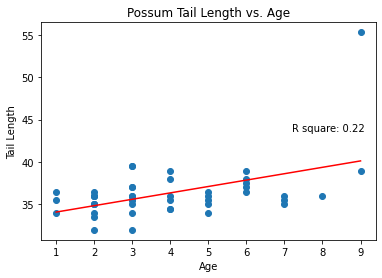

In [1263]:
# Make the design matrix using np.c_ 
y = possum_data.tailL
x = possum_data.age

# Scatter plot 
fig, ax = plt.subplots() 
ax.scatter(x,y)

ax.set_title('Possum Tail Length vs. Age')
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')

# X matrix with equally space data 
x_grid = np.linspace(x.min(), x.max(), x.size)
Xr = np.c_[np.ones(x_grid.size), x]

# Fitting function 
fit = linearModelFit(Xr, y, linearModelLossRSS)

Xp = np.c_[np.ones(x_grid.size), x_grid]
yp = Xp @ fit[0] 

# Plot Regression Line 
ax.plot(x_grid, yp, color='red')

# Display R2 value 
ax.annotate(f'R square: {fit[1].round(2)}',
           xy = (0.75, 0.5),
           xycoords = 'axes fraction')

plt.show()


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 

In [1264]:
def linearModelLossLAD(b, X, y):
    
    yp = X @ b
    l = sum(abs(y-yp))
    grad = -np.sign((y-yp)) @ X    
    return l, grad


# Input OG 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# Input 1
X2 = np.array([[2,1],[3,-1],[-1, 1]])
b2 = np.array([0.2,0.45])
y2 = np.array([0.2,0.6, 2])

# Input 2
X1 = np.array([[1,1],[1,-1],[1, 2]])
b1 = np.array([0.2,0.45])
y1 = np.array([0.2,0.1, 2])

# Output data
print(linearModelLossLAD(b, X, y))
print(linearModelLossLAD(b1, X1, y1))
print(linearModelLossLAD(b2, X2, y2))

(2.0, array([-1., -1.]))
(1.7, array([-1.,  0.]))
(2.85, array([0., 1.]))


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, the code below will plot the fit.  The code will also print the R squared value on the plot.

Written answer: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



(array([34.50470793,  0.33291433]), 0.12937096211205001)
[34.50470793  0.33291433]


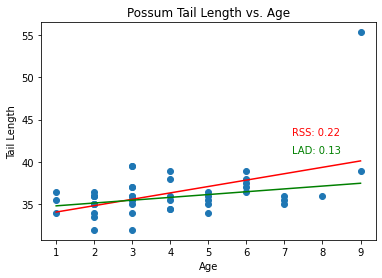

In [1265]:
y = possum_data.tailL
x = possum_data.age


# Scatter Plot
fig, ax = plt.subplots() 
ax.scatter(x,y)

ax.set_title('Possum Tail Length vs. Age')
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')

# X matrix with equally space data 
x_grid = np.linspace(x.min(), x.max(), x.size)
Xr = np.c_[np.ones(x_grid.size), x]
Xp = np.c_[np.ones(x_grid.size), x_grid]

# Optimize for both regression models 
rss = linearModelFit(Xr, y, linearModelLossRSS)
lad = linearModelFit(Xr, y, linearModelLossLAD)
print(lad)

print(lad[0])
# Predicted y values from regression models
y_rss = Xp @ rss[0] 
y_lad = Xp @ lad[0]

# Plot Regression Line
ax.plot(x_grid, y_rss, color = "red")
ax.plot(x_grid, y_lad, color = "green")

#ax.plot([min(x), max(x)], [min(y_rss), max(y_rss)], color='red')
#ax.plot([min(x), max(x)], [min(y_lad), max(y_lad)], color='green')

# Display R2 value
ax.annotate(f'RSS: {rss[1].round(2)}', xy = (0.75, 0.48), xycoords = 'axes fraction', color = 'red')
ax.annotate(f'LAD: {lad[1].round(2)}', xy = (0.75, 0.4), xycoords = 'axes fraction', color = 'green')

plt.show()

Written Answer:
The LAD line of regression has a more horizontal slope. The r squared value of the LAD model is lower since it put less emphasis on outliers compared to the RSS is model. 
Putting less emphasis on the outliers will make the line fit local data better but will have a worse global data fit (r squared value)




### Question 2.3: /15 points

Fit both an OLS model and a LAD model with `statsmodels`.  In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?


In [1266]:
# LAD
model_lad = smf.quantreg(formula="tailL ~ age",data=possum_data)
res = model_lad.fit(q=.5)

# Note pseudo r squared values can only be compared to other pseudo 
print(res.summary())

yp = Xr @ [34.5, 0.3333]
rss = np.sum((y-yp)**2)
tss = np.sum((y-np.mean(y))**2)
lad_rsquared = 1 - (rss/tss)
print(f'LAD: {lad_rsquared}')

# OLS
sm.OLS(x,y)
df = pd.DataFrame({'x':x, 'y':y})
model_ols = smf.ols('y~x', data=df).fit()
print(f'OLS: {model_ols.rsquared}')


                         QuantReg Regression Results                          
Dep. Variable:                  tailL   Pseudo R-squared:              0.03058
Model:                       QuantReg   Bandwidth:                       2.586
Method:                 Least Squares   Sparsity:                        4.962
Date:                Mon, 21 Sep 2020   No. Observations:                   46
Time:                        02:28:29   Df Residuals:                       44
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5000      0.791     43.617      0.000      32.906      36.094
age            0.3333      0.177      1.881      0.067      -0.024       0.691
LAD: 0.12919792407688335
OLS: 0.22286587947604075


Written Answer:
The r squared values calculated using the optimization function and the sm & smf libraries are almost identical.
The optimization function gives a very good estimate while the sm & smf give the exact r squared value. 



